<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/notebooks/phd/Lesson_3_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on Python for Data Science


- ### PhD IMT School for advanced studies Lucca


#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2022/2023<br/>
April, 28 2023

# Today lesson 

- How to organize a ML project and the steps you need to perform
- Regression 
- Classification 

... and some scikit-learn functionalities to authomatize the ML process. 

# Taxonomy of ML

-  Roughly speaking there are two main **categories** of ML tasks:

    1.  **Supervised Learning**: Given a set of **labeled** examples, **predict** the labels of _new and unseen_ examples
    2.  **Unsupervised Learning**: Given a set of examples, **find structure** in the data (e.g., _clusters_, _subspaces_, _manifolds_)

## Supervised learning
The main difference between **Regression** and **Classification** algorithms that: 
- **Regression** algorithms are used to predict the _continuous values_ such as price, salary, age, etc. and
- **Classification** algorithms are used to predict/classify the _discrete values_ such as Male or Female, True or False, Spam or Not Spam, etc.



# Check list for a Machine Learning project 

1. Understand the problem.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
  - split on training and test
  - handling missing values
  - categorical values
  - scaling 
  - etc.
5. Compare different models, choose the best and train it.
6. Fine-tune your model.
7. Present your solution.
  - stakeholder
  - paper
  - supervisor
  - etc.



#### Scikit API introduction

- Consinstency: All objects share a consistent and simple interface 
  + Estimators: 
    - Any object that can estimate some parameters based on a dataset
is called an _estimator_ 
    - It uses the fit() and it takes only the dataset as parameters, the others are considered hyperparameters.
  + Transformers: Some estimators can transform the dataset. 
    - transform() method with the dataset to transform as a parameter.
    - fit_transform() to perform both operation at once (more quickly)
  + Predictors: estimators that make predictions
    - predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions.
    - score() to measure the quality of the predictions
- Inspection
  + All the estimator’s hyperparameters are accessible directly via public
instance variables
  + all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix
- Nonproliferation of classes
  +  Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes
- Composition: Create pipelines 
- Sensible defaults: scikit provides reasonable default values for most
parameters, making it easy to create a baseline working system quickly

## Understand the problem.

### A regression  problem

We load data of a dataset that contains the median house prices in California. So the prices can assume _continous_ values, therefore we need to apply *Regression* methods/algorithms.

It is a quite old dataset, however it presents the basic properties needed to explain the different tasks that a **Data Scientist** should take into account before delivering any results. 


In order to understand the problem, we need to clarify some aspects that will influence the rest of the pipeline/project: 

- **[Supervised/Unsupervise]:** Since we do have _labels_ (prices) we can use a **_Supervised_** method. 

- **[Classification/Regression]:** can assume _continous_ values, therefore we need to apply **_Regression_** methods/algorithms

- **[Evalutation]:** How to evaluate the performance of our models, defining a measure of error/accuracy

#### Error
Since we are in regression problem there are some options out there: 
- **RMSE** Root Mean Square Error
  - Also called _Euclidean Norm_ or $l_2$ _norm_  and indicated with \|\|.\|\|_2 

- **MAE**  Mean Absolute Error
  - Also called Manhattan norm because it measures the distance between two points in a city if you can only travel along orthoganal city blocks. It is also called $l_1$ _norm_ and indicated with \|\|.\|\|_2

- **[Considerations]** 
  - Generally, with a larger $K$ in $l_k$ The higher the norm index, the more it focuses on large values and neglects small
ones. This is why the **RMSE is more sensitive to outliers** than the MAE.  
  - when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.
  


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

from google.colab import drive
drive.mount('/content/drive')

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Mounted at /content/drive


## Get the data

Let's get the data from our shared drive. 

We want to estimate the median_house_value per district.


``` python
from google.colab import drive
drive.mount('/content/drive')
```

In [2]:
housing = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/housing/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print('N. of rows: {}'.format(housing.shape[0]))
print('N. of columns: {}'.format(housing.shape[1]))
print('The columns contained in our first dataframe are:\n{}'.format( ',\n'.join('{}. {}'.format(i,c) for i,c in enumerate(housing.columns)) ))

N. of rows: 20640
N. of columns: 10
The columns contained in our first dataframe are:
0. longitude,
1. latitude,
2. housing_median_age,
3. total_rooms,
4. total_bedrooms,
5. population,
6. households,
7. median_income,
8. median_house_value,
9. ocean_proximity


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 **4   total_bedrooms      20433 non-null  float64**
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
** 9   ocean_proximity     20640 non-null  object **
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
```

Two columns present some peculiarities? 

- total_bedrooms
- ocean_proximity

Do you know these peculiarities? 

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.shape

(20635, 10)

In [7]:
housing = housing[housing["ocean_proximity"]!='ISLAND'].copy()

In [9]:

housing.reset_index(inplace=True,drop=True)

In [11]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288,NaN
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000,NaN
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000,NaN


## Explore the data and visualize

It helps to identify peculierities in our datasets, and if we -- data scientist -- we need to take into account some specificity that we highlight through some simple visualization plots. 

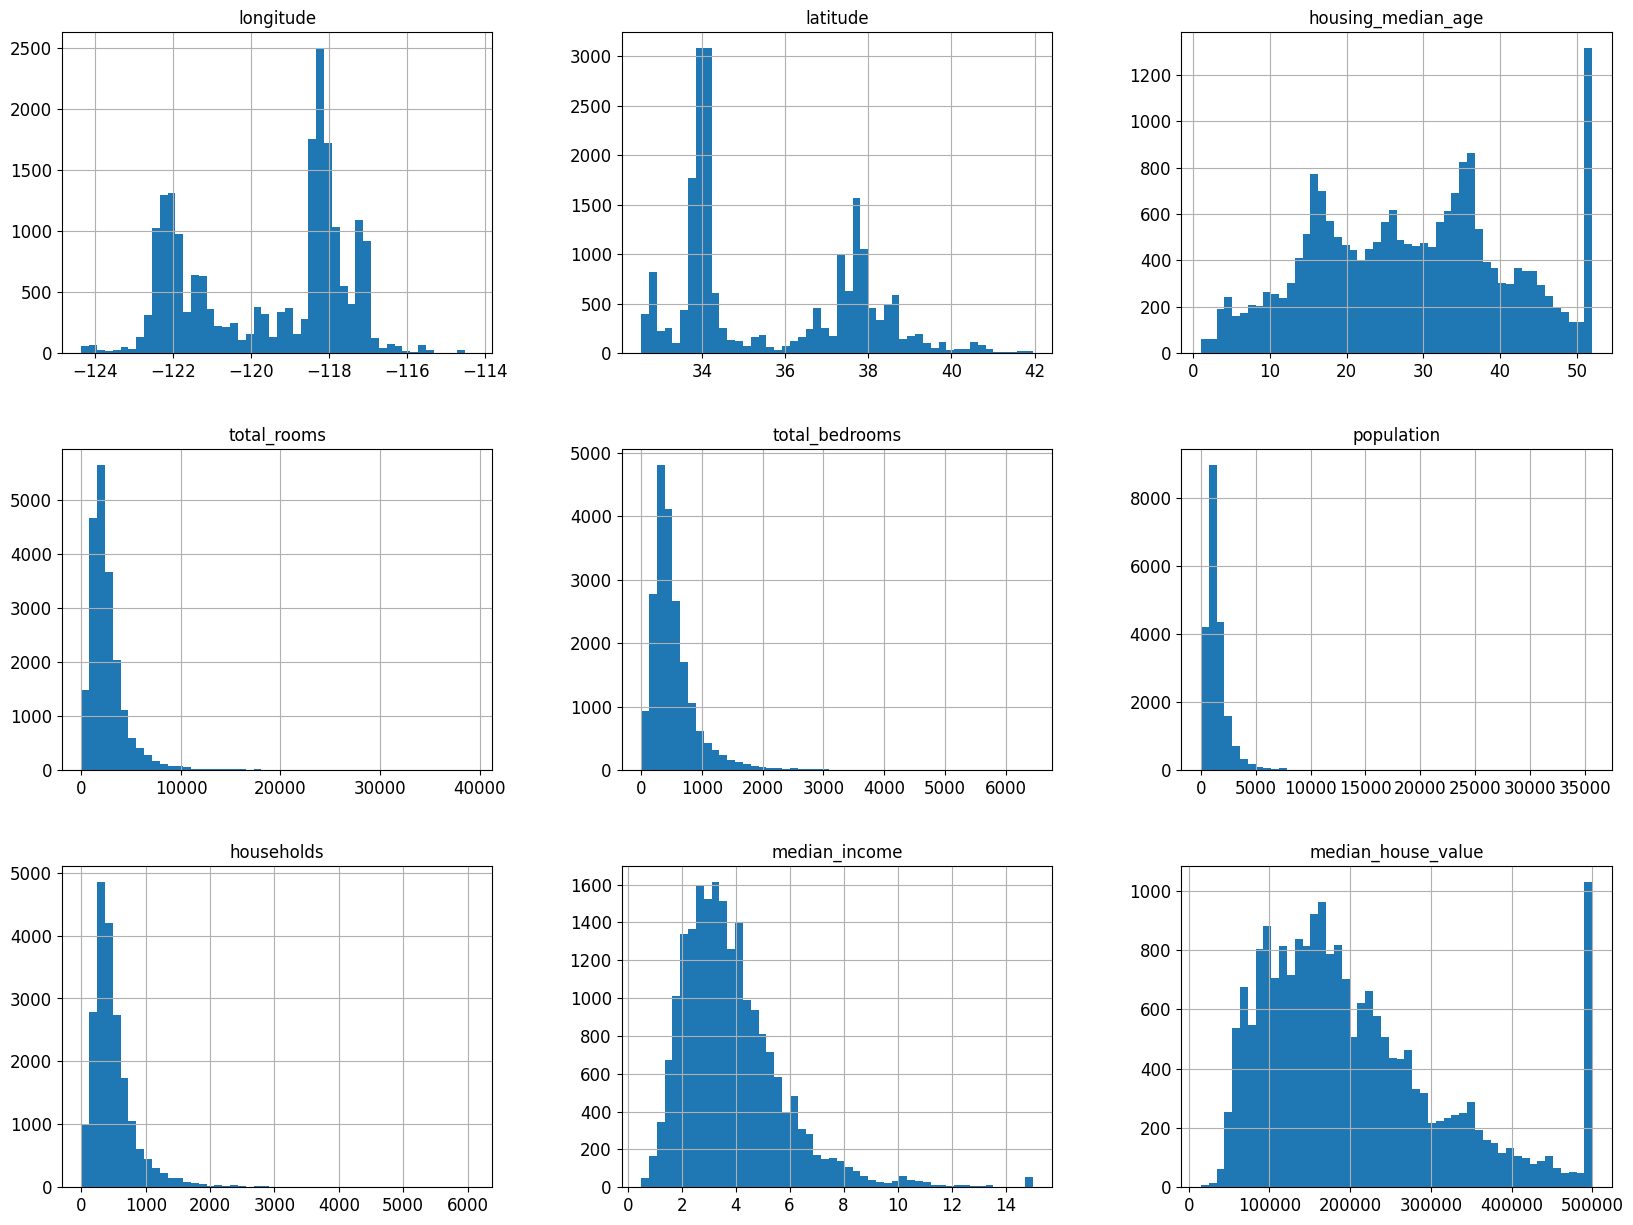

In [12]:
'''
We call hist() function defined for pandas dataframes. 
It's a Pandas function that generates histograms for numerical features
'''

housing.hist(bins=50, figsize=(20,15))
plt.show()

### Some comments on the data

1. The variable _median income_ doesn't seem to be expressed in US dollars.
   + They are capped:
    - to 15 (15000) for higher median income
    - 0.5 for lower median income
   + The numbers represent tens of thousands of dollars: 3\$-->3000\$
2. The housing __median age__ and the __median house__ value are also capped
3. All the features present almost a different scale w.r.t. the others. 
4. Many histograms are tail-heavy. The machine learning algorithms can have problems to detect this not-that-frequent patterns. 

We discussed some other functions to easily and quickly visualize the data of our dataframes. 

- Correlation Matrix
- Seaborn pairplots 
- KDE

In [14]:
# tipically we group by the classes when we deal with a classification task
# In any case, we could see if there are any interesting pattern emerging, or differences in the distributions.
plot=True
if plot:
  _ = sns.pairplot(housing[:5000],hue='ocean_proximity') 


Error in callback <function flush_figures at 0x7f1f53165000> (for post_execute):


KeyboardInterrupt: ignored

<ipython-input-15-9320e27662d7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


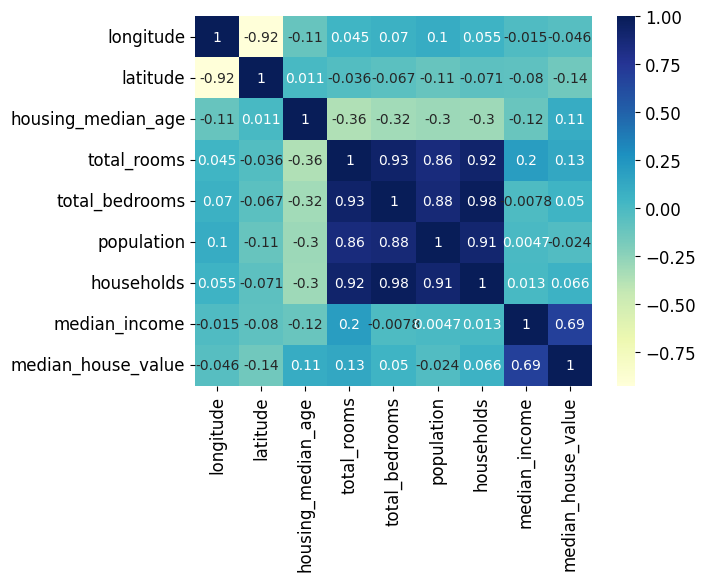

In [15]:
'''
Another check that we could do is to verify if features have strong correlation among them or with the target variable
'''

corr = housing.corr()
_ = sns.heatmap(corr, annot=True,cmap="YlGnBu")

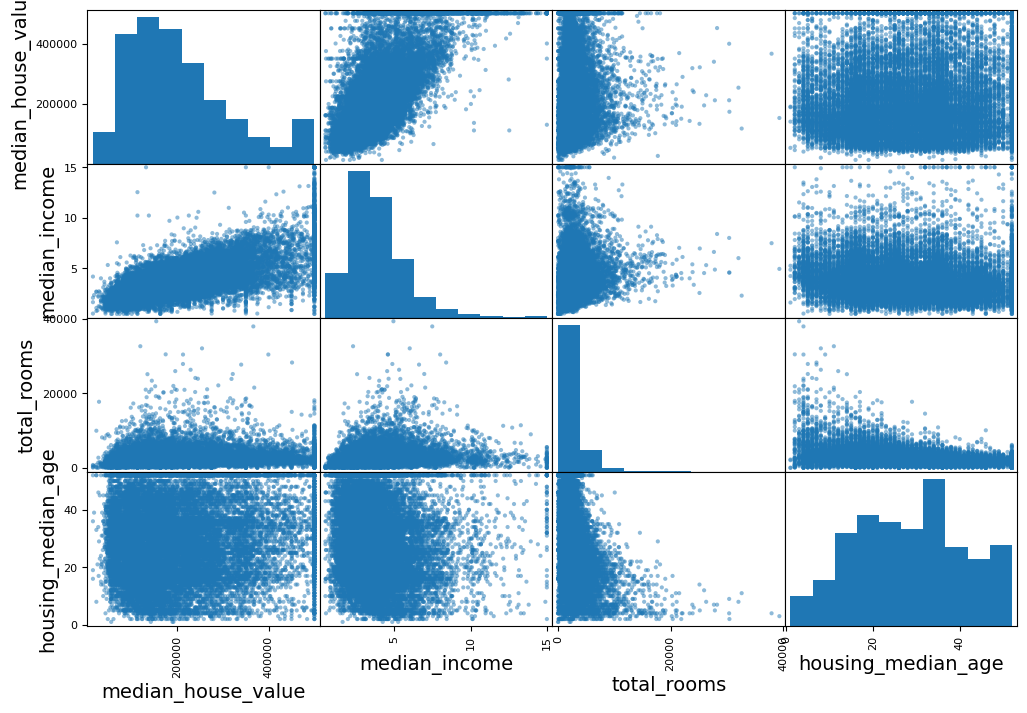

In [16]:

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [ ]:
'''
We can check which features have a greater correlation with the target variable 
'''
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688563
total_rooms           0.134373
housing_median_age    0.105272
households            0.066069
total_bedrooms        0.049792
population           -0.024421
longitude            -0.046208
latitude             -0.143837
Name: median_house_value, dtype: float64

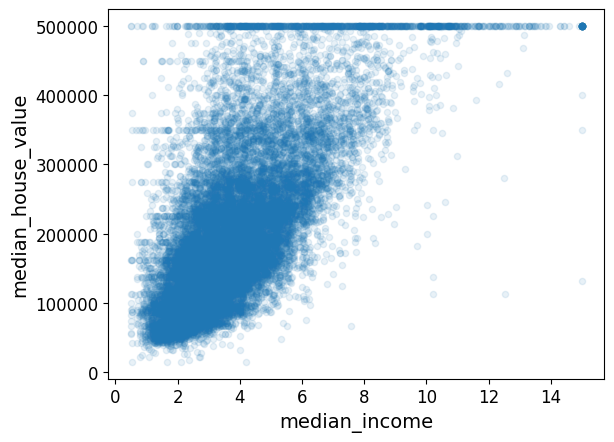

In [17]:
'''
Looking at the previous results, the __median_income__ is the most correlated. 
Let's focus just with this plot now

We can notice the capped value at 500000$ and other unexpected horizontal lines. 
These might indicate some odd patterns in the data. 
A datascientist should evaluate if to keep these rows in the pipeline or discard them.

'''

_ = housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.1)

<Axes: xlabel='longitude', ylabel='latitude'>

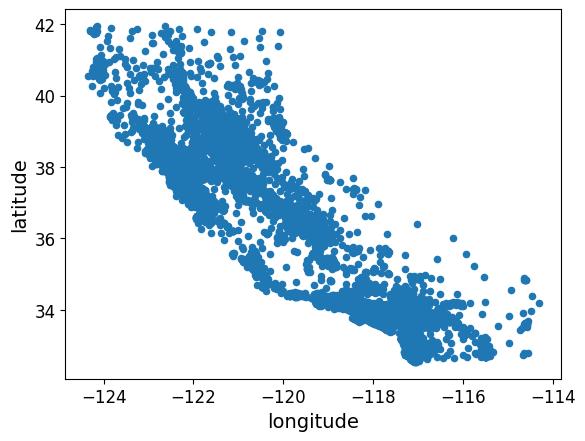

In [18]:
'''
First plot
'''

housing.plot(kind="scatter", x="longitude", y="latitude")


<Axes: xlabel='longitude', ylabel='latitude'>

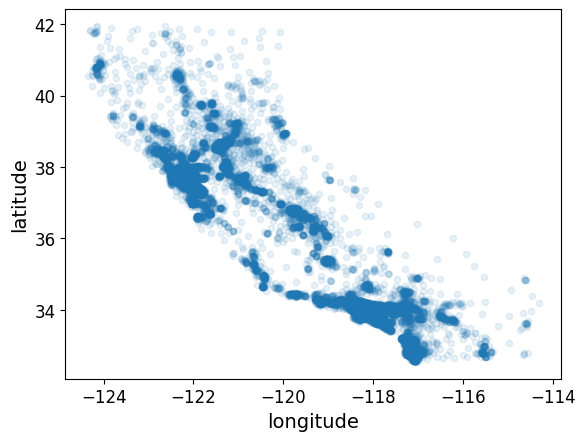

In [19]:
'''
Changing the value of the alpha parameter is possible now to spot some interesting patterns, 
i.e. the high-density areas, namely the Bay Area and around Los Angeles and San Diego, 
plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.
'''

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)



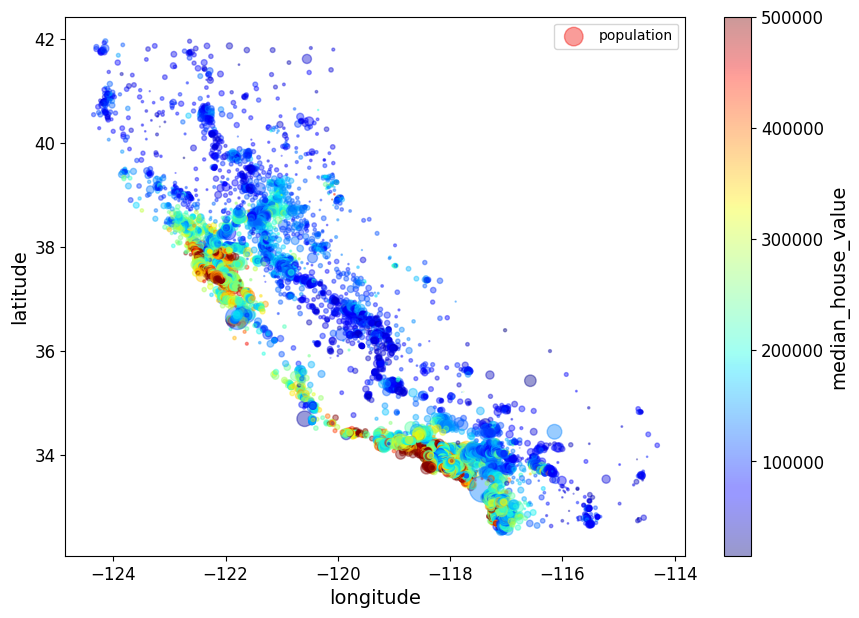

In [20]:
'''
Let's check the median house prices

The radius of each circle represents the district’s population (option s),
 and the color represents the price (option c). Colors range from blue
(low values) to red (high prices):

The location has a high influence on the prices as well as the population density

'''

_ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
# save_fig("housing_prices_scatterplot")

## Data preparation 

### Split in training and test. 

Scikit-learn provides to the developers a series of function that can be used to split the original dataset in training and test. 

- ***__Training__*** is the set used to train our model together with the relative pipeline
- ***__Test__*** is the dataset that shouldn't be touched until the very end of the ML process. Everything needs to be "learned" from the training set (e.g. imputing value for an inputer)

In [22]:
from sklearn.model_selection import train_test_split

'''
1. random_state to get the same dataset split in different runs.
2. test_size the proportion of the dataset that we want to preserve for test, the rest is for training.
3. This is a purely random --> can introduce a significant sampling bias
'''

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
type(train_set)

pandas.core.frame.DataFrame

We can imagine that the** median income** is a really important feature to predict the median houses pricing. Thus: 

+ We want to avoid a sample bias between training and test. 
+ Ensure that the test set is representative of the various categories of incomes in the whole dataset.

--->  ***stratified sampling***: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population

In order to use the median income as a categorical value we need to create a new column using a special function of pandas... do you remember? 



In [24]:
'''
pd.cut creates bins and assigns each row to a specific bin given the intervals provided to the function. 
'''

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [25]:
'''
Check the frequency of the new values
'''

housing["income_cat"].value_counts()

3    7235
2    6577
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

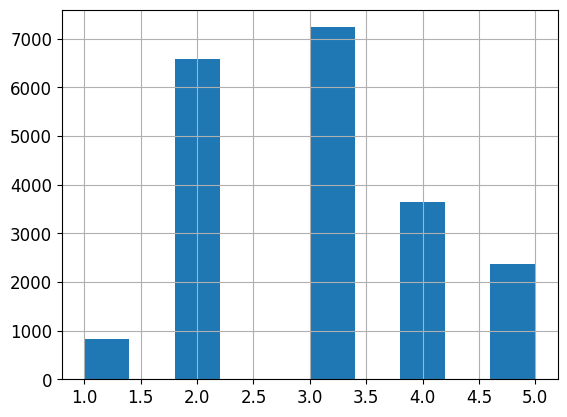

In [26]:
'''
and here the relative plot
'''
_ = housing["income_cat"].hist()

In [27]:
'''
Now that we have a column with discrete values, it is easier to preserve the distributions between training and test set. 
Scikit provides StratifiedShuffleSplit

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and
ShuffleSplit, which returns stratified randomized folds
'''

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
''' 
Let's check if the proportion of income cat is mantained between test and training
'''
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

3    0.350618
2    0.318633
4    0.176399
5    0.114369
1    0.039981
Name: income_cat, dtype: float64
3    0.350618
2    0.318755
4    0.176339
5    0.114490
1    0.039799
Name: income_cat, dtype: float64


In [ ]:
'''
We can compare the results with the pure random split
'''

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039835,0.039981,0.041919,5.231144,0.364964
2,0.318730,0.318633,0.321299,0.805839,-0.030409
3,0.350618,0.350618,0.359341,2.487906,0.000000
4,0.176351,0.176399,0.165980,-5.880736,0.027480
5,0.114466,0.114369,0.111461,-2.624894,-0.084674


In [ ]:
'''
And finally we can drop the created column 
'''

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Feature engineering

In [29]:
'''
Another strategy to enrich the dataset under analysis is to create new features
defined as a combination of the existing ones. 

For example, in this case, the number of rooms per district is not really informative, if you don't normalize this number by the number of households. 

Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. 

The population per household also
seems like an interesting attribute combination to look at

'''

# we create new columns in the dataframe using the pandas syntax and we combine through 
# arithmetic operations two columns.

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [30]:
'''
And now we can check if we found some interesting correlation with the target variable and the new ones.
'''

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-30-e9d81474af60>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688563
rooms_per_household         0.151968
total_rooms                 0.134373
housing_median_age          0.105272
households                  0.066069
total_bedrooms              0.049792
population_per_household   -0.023719
population                 -0.024421
longitude                  -0.046208
latitude                   -0.143837
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

1. The __bedrooms_per_room__ feature is much more correlated with the median_house_value than the total number of rooms or bedrooms. It seems that houses with a lower bedroom/room ration tend to be more expensive

2. Also the __rooms_per_household__ is more informative than the total number of rooms in a district.

In [31]:
'''
From now on we will use the strat_train_set as DataFrame
'''

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy() # our labels

### Data cleaning

#### Missing values

• Get rid of the corresponding districts.
  - ``` housing.dropna(subset=["total_bedrooms"]) ```

• Get rid of the whole attribute.

  - ```housing.drop("total_bedrooms", axis=1) ```

• Set the values to some value (zero, the mean, the median, etc.).
  - ``` median = housing["total_bedrooms"].median() ```
  - ``` housing["total_bedrooms"].fillna(median, inplace=True) ```
  - compute the median value on the training set, and use that value to replace missing values in the test set when you want to evaluate your system

For this last option scikit provides a simple class <code>SimpleImputer</code> 

In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
20120,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,<1H OCEAN,2
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN,2
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND,4
5654,-118.30,33.73,42.0,1731.0,NaN,866.0,403.0,2.7451,NEAR OCEAN,2
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,<1H OCEAN,2


In [33]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [34]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
20120,-118.80,34.41,45.0,1610.0,1148.0,347.0,2.7000,<1H OCEAN,2
5665,-118.29,33.73,30.0,3161.0,1865.0,771.0,2.7139,NEAR OCEAN,2
5990,-117.73,34.10,37.0,3457.0,1344.0,530.0,5.8891,INLAND,4
5654,-118.30,33.73,42.0,1731.0,866.0,403.0,2.7451,NEAR OCEAN,2
4743,-118.36,34.05,42.0,1372.0,674.0,271.0,2.8793,<1H OCEAN,2


In [36]:
median = housing["total_bedrooms"].median()
print("The median of total_bedrooms is {}".format(median))
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

The median of total_bedrooms is 435.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
20120,-118.80,34.41,45.0,1610.0,435.0,1148.0,347.0,2.7000,<1H OCEAN,2
5665,-118.29,33.73,30.0,3161.0,435.0,1865.0,771.0,2.7139,NEAR OCEAN,2
5990,-117.73,34.10,37.0,3457.0,435.0,1344.0,530.0,5.8891,INLAND,4
5654,-118.30,33.73,42.0,1731.0,435.0,866.0,403.0,2.7451,NEAR OCEAN,2
4743,-118.36,34.05,42.0,1372.0,435.0,674.0,271.0,2.8793,<1H OCEAN,2


In [37]:
'''
Use the scikit class SimpleImputer. 

First, we create an instance of that type of object using a median as the strategy

'''

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# we drop the non numerical column/feature/attribute
housing_num = housing.drop("ocean_proximity", axis=1)

# we fit the imputer on the sub-set just created. 
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
'''
The Imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. 

Only the total_bedrooms attribute had missing values, but we cannot be sure that
there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes
'''
imputer.statistics_
print([ '{} {}'.format(c,m)  for c,m in zip(housing_num.columns,imputer.statistics_)])


['longitude -118.51', 'latitude 34.26', 'housing_median_age 29.0', 'total_rooms 2131.0', 'total_bedrooms 435.0', 'population 1170.0', 'households 410.0', 'median_income 3.54275', 'income_cat 3.0']


In [39]:
'''
Now we can transform our dataset
'''
X = imputer.transform(housing_num)
print(type(X))

# we create a new dataframe since the result of the transform operation is a numpy array.
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

<class 'numpy.ndarray'>


In [41]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16508 entries, 0 to 16507
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16508 non-null  float64
 1   latitude            16508 non-null  float64
 2   housing_median_age  16508 non-null  float64
 3   total_rooms         16508 non-null  float64
 4   total_bedrooms      16508 non-null  float64
 5   population          16508 non-null  float64
 6   households          16508 non-null  float64
 7   median_income       16508 non-null  float64
 8   income_cat          16508 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


#### Categorical values

Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers. 

There are different strategies and it depends the type of data we are handling. 

OrdinalEncoder when the order of the values has a meening, e.g. bad, good, very good, excellent.
``` python
from sklearn.preprocessing import OrdinalEncoder
```


OneHotEncoder when the values do not present a meaningful order, e.g. provinces.
```python
from sklearn.preprocessing import OneHotEncoder
```


In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16508x4 sparse matrix of type '<class 'numpy.float64'>'
	with 16508 stored elements in Compressed Sparse Row format>

In [45]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

Given the flexibility of scikit, and the API structure, it is possible to define Custom Transformers. 

All we need is to create a class with three methods: 
1. fit() --> return self
2. transform()
3. fit_transform()

In our case, we can use a custom transformer for the creation of the new attributes defined as a combination of attributes. 

In [47]:
'''
TransformerMixin already provides fit_transform for free. 

Adding BaseEstimator we get two extra methods get_params() and set_params()
These can be useful for automatic hyperparameter tuning

add_bedrooms_per_room is the only hyperparameter, it allows us to understand if this computed attribute is useful to increase the quality of our model. 
'''



from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room ## this is the only hyperparameter that we would like to tune.
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Feature scaling 

- **Min-max** scaling (many people call this **normalization**) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1 -
  +  ```MinMaxScaler()```

- **Standardization** is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms 
 + ```StandardScaler()```

 Notice that it is important to fit the scalers to the **training data only**, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).

## Pipeline 

- Pipeline
``` python 
class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)
```

  - Sequentially apply a list of transforms and a final estimator.
  -Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. 
  - The final estimator only needs to implement fit. 

  - The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

  - For this, it enables setting *parameters* of the various *steps* using their names and the parameter name separated by a ‘__’. 



In [48]:
'''
The Pipeline is built using a list of (key, value) pairs, where the key 
is a string containing the name you want to give 
this step and value is an estimator object:
'''

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [49]:
'''
The estimators of a pipeline are stored as a list in the steps attribute, 
but can be accessed by index or name by indexing (with [idx]) the Pipeline:
'''

print('which is the first step of the pipeline? {}'.format(num_pipeline.steps[0]))
print('which is the first step of the pipeline? {}'.format(num_pipeline[0]))
print('which is the first step of the pipeline? {}'.format(num_pipeline['std_scaler']))

'''
tab completion when using the named_step attribute of the pipeline
'''
num_pipeline.named_steps.std_scaler


which is the first step of the pipeline? ('imputer', SimpleImputer(strategy='median'))
which is the first step of the pipeline? SimpleImputer(strategy='median')
which is the first step of the pipeline? StandardScaler()


StandardScaler()

In [50]:
'''
A sub-pipeline can also be extracted using the slicing notation commonly used 
for Python Sequences such as lists or strings (although only a step of 1 is permitted).
This is convenient for performing only some of the transformations (or their inverse):
'''

print(num_pipeline[0:2])

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribs_adder', CombinedAttributesAdder())])


In [ ]:
'''

Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax
'''

num_pipeline.set_params(attribs_adder__add_bedrooms_per_room=True)

'''
This is particularly important for doing grid search, we will see later

'''



'\nThis is particularly important for doing grid search, we will see later\n\n'

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [194958.44695513 210652.28266342 142991.92523752  71556.27712582
 148214.37835316]


In [ ]:
print("Labels:", list(some_labels))


Labels: [120400.0, 156500.0, 88900.0, 131900.0, 177400.0]


In [53]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions, squared = False)
print(lin_mse)

68156.121958574


In [54]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49488.24508183763

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [57]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### GridSearchCV
  - ```python 
  class sklearn.model_selection.GridSearchCV(estimator, param_grid, *,
  scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, 
  pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
  ```
  - Exhaustive search over specified parameter values for an estimator.
  - Important members are fit, predict.
  - GridSearchCV implements a “fit” and a “score” method. 
  - It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

  - The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

  - CV --> CrossValidation 
  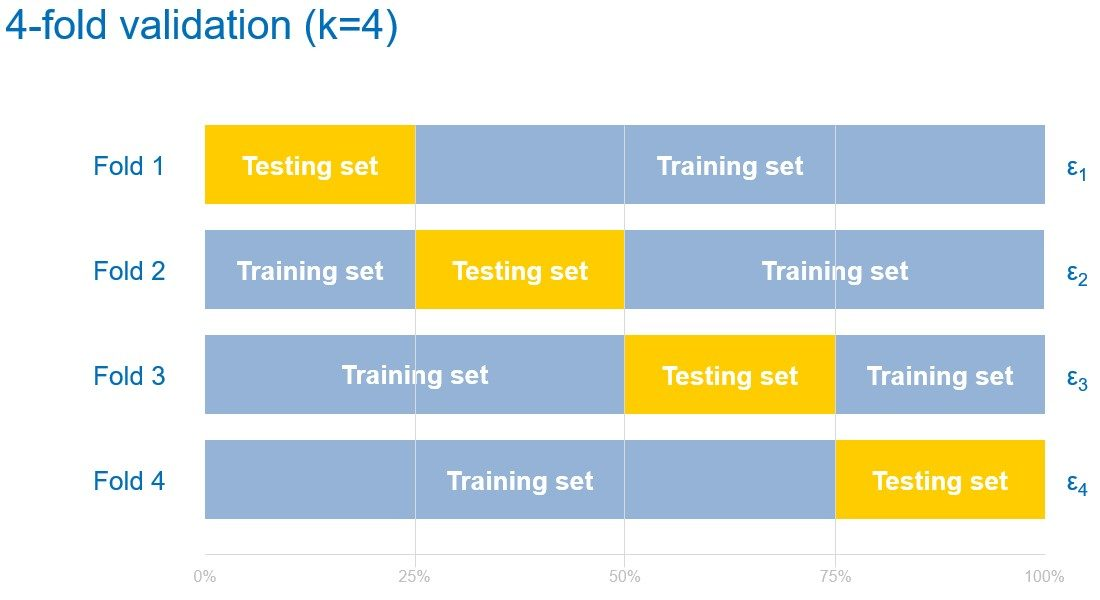


In [ ]:
'''
cross_val_score randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array con
taining the 10 evaluation scores
'''
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70309.37964323 68759.4312107  70124.39236991 68020.54761203
 67758.75320496 74226.63971362 71904.55233119 70310.28598468
 73923.87585958 69753.84198681]
Mean: 70509.16999167089
Standard deviation: 2122.3702331771833


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72624.2383692  68476.46953478 66355.17863333 69897.5390847
 65320.48083569 69119.272106   64129.79661213 71763.13150562
 71959.99885653 67324.67922491]
Mean: 68697.07847628833
Standard deviation: 2770.692813759181


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18732.0401322411

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52285.37142956 49596.35685494 49647.8870784  48694.84214492
 47016.02457884 50719.36716695 47376.69276793 49759.35099756
 52191.83945155 50380.39247607]
Mean: 49766.81249467189
Standard deviation: 1672.710871544824


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

GridSearch and Pipeline can be combined. 

The estimator can be a parameter as well of the grid. 
It is possible to access the different parameters of each estimator as we saw before. 

In [ ]:

pipeline = Pipeline(steps=[('preprocessor',full_pipeline),('regressor',RandomForestRegressor(random_state=42))])

In [ ]:
params =[{'preprocessor': [full_pipeline],
        'regressor': [LinearRegression()],
        'regressor__fit_intercept':[True]},
        {'preprocessor': [full_pipeline],
          'regressor': [RandomForestRegressor(random_state=42)],
         'regressor__n_estimators':[10,20],
         'regressor__min_samples_split': [5,10]}
         ]
grid_search = GridSearchCV(pipeline, params, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
      

In [ ]:
grid_search.best_params_

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('attribs_adder',
                                                   CombinedAttributesAdder()),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  ['longitude', 'latitude', 'housing_median_age',
                                   'total_rooms', 'total_bedrooms', 'population',
                                   'households', 'median_income']),
                                 ('cat', OneHotEncoder(), ['ocean_proximity'])]),
 'regressor': RandomForestRegressor(min_samples_split=10, n_estimators=20, random_state=42),
 'regressor__min_samples_split': 10,
 'regressor__n_estimators': 20}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                   

In [ ]:
cvres = pd.DataFrame(grid_search.cv_results_)
print(cvres.columns)
cvres['sqrt'] = np.sqrt(-cvres['mean_test_score'])
cvres.sort_values(by='sqrt',ascending=True)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_preprocessor', 'param_regressor',
       'param_regressor__fit_intercept', 'param_regressor__min_samples_split',
       'param_regressor__n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor,param_regressor,param_regressor__fit_intercept,param_regressor__min_samples_split,param_regressor__n_estimators,params,...,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,sqrt
4,1.851144,0.010459,0.031387,0.000247,"ColumnTransformer(transformers=[('num',\n ...","RandomForestRegressor(min_samples_split=10, n_...",NaN,10,20,{'preprocessor': ColumnTransformer(transformer...,...,-2.754450e+09,-2.705764e+09,6.119559e+07,1,-8.508098e+08,-8.760234e+08,-8.219595e+08,-8.495976e+08,2.208811e+07,52016.959890
2,1.948081,0.008998,0.034199,0.000686,"ColumnTransformer(transformers=[('num',\n ...","RandomForestRegressor(min_samples_split=10, n_...",NaN,5,20,{'preprocessor': ColumnTransformer(transformer...,...,-2.777776e+09,-2.717056e+09,6.311365e+07,2,-5.739524e+08,-5.849869e+08,-5.610703e+08,-5.733365e+08,9.773640e+06,52125.389465
3,0.927572,0.001651,0.019871,0.000209,"ColumnTransformer(transformers=[('num',\n ...","RandomForestRegressor(min_samples_split=10, n_...",NaN,10,10,{'preprocessor': ColumnTransformer(transformer...,...,-2.860174e+09,-2.820602e+09,5.217207e+07,3,-9.092902e+08,-9.597990e+08,-9.001899e+08,-9.230931e+08,2.621958e+07,53109.335606
1,1.174434,0.248539,0.021403,0.000243,"ColumnTransformer(transformers=[('num',\n ...","RandomForestRegressor(min_samples_split=10, n_...",NaN,5,10,{'preprocessor': ColumnTransformer(transformer...,...,-2.906243e+09,-2.853296e+09,4.618482e+07,4,-6.416936e+08,-6.658863e+08,-6.500398e+08,-6.525399e+08,1.003362e+07,53416.248800
0,0.082449,0.027569,0.023277,0.004703,"ColumnTransformer(transformers=[('num',\n ...",LinearRegression(),True,NaN,NaN,{'preprocessor': ColumnTransformer(transformer...,...,-4.855928e+09,-4.723897e+09,9.336222e+07,5,-4.702550e+09,-4.720093e+09,-4.601317e+09,-4.674653e+09,5.234863e+07,68730.614709


In [ ]:

grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                   

In [ ]:
'''
Once we get the best estimator we can check -- at least for some models -- the feature importance. 
Such as which are the features that are __more used__ to make the predictions 

Firstly, we get the feature importance of our best regressor
Then, we associate each value to the relative name gathered from the pipeline
Finally, we print them.
'''

feature_importances = grid_search.best_estimator_['regressor'].feature_importances_
feature_importances

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.49536059053227255, 'median_income'),
 (0.14497856570828155, 'INLAND'),
 (0.12449177588603076, 'pop_per_hhold'),
 (0.05577158820812858, 'longitude'),
 (0.05394454534569986, 'latitude'),
 (0.04231834751988259, 'housing_median_age'),
 (0.02327095647268272, 'rooms_per_hhold'),
 (0.019654394605416913, 'bedrooms_per_room'),
 (0.009213249756062676, 'total_bedrooms'),
 (0.009143427509476838, 'total_rooms'),
 (0.009112409695909115, 'population'),
 (0.00895998612643454, 'households'),
 (0.0022346860384240387, 'NEAR OCEAN'),
 (0.0008811127740079714, '<1H OCEAN'),
 (0.0006643638212894097, 'NEAR BAY')]

## Classification

Now we prove how good we are in a classification tasks. 

Given a set of drawn digits we want to predict if the image is a 5 or not. 

This is a problem of BINARY CLASSIFICATION 

We will study which are the quality measures that we need to take into account to improve the perfomance of our model. 
 - Confusion matrix
 - Precision vs Recall
 - F1
 - ROC and AUC

In [ ]:
'''
We gathered the MNIST Dataset from the dataset available directly on scikit 
'''

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
'''
Let's explore some property of this dataset. 
'''

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

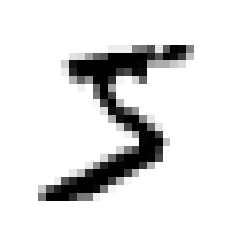

In [ ]:
'''
And how it looks like
'''

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

# save_fig("some_digit_plot")
plt.show()

In [ ]:
'''
y contains the label for each image
'''

y[0]

'5'

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

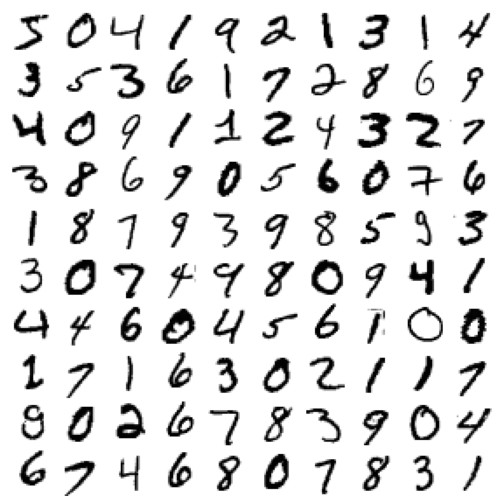

In [ ]:
'''
Some more images, just to have an idea of the content
'''
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [ ]:
'''
In this case, we don't use any scikit function to create training and test.
We simply take the first 60000 as training and the remaining as test.
'''

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
'''
As I said before, just to start and to understand some metrics tipically used
We build a binary class: it's a 5 or not. 

Therefore, we will train a model to predict if a given image is a 5 or not.
'''

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:

y_train_5

array([ True, False, False, ...,  True, False, False])

### Select the best evaluation metrics! 
- Accuracy? 
- Some others? 

In [ ]:
'''
We try a Stochastic Gradient Descent algorithm  
'''

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

```python
class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001,
shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, 
validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)[source]¶
```

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
'''
Let's try a cross validation, as we did it before. 

- Notice that we use as scoring metrics the ACCURACY
'''

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
'''
Our classifier seems working pretty good. 

And if define a classifier that predicts always false?

'''


from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
'''
The model accuracy is pretty high also for this simple classifier, greater than 90%

Probably the accuracy is not the right metrics to use. 
'''

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
'''
We can check how our classifier predicts all the instances w.r.t. the real label

This is represented as matrix called Confusion Matrix. 

Each row represents an actual class
Each column represents the predicted class
_____________
|     |     |
| TP  | FP  |
|_____|_____|
|     |     |
| FN  | TN  |
|_____|_____|

The diagonal contains the correctly labelled instances

'''

'\nWe can check how our classifier predicts all the instances w.r.t. the real label\n\nThis is represented as matrix called Confusion Matrix. \n\nEach row represents an actual class\nEach column represents the predicted class\n_____________\n|     |     |\n| TP  | FP  |\n|_____|_____|\n|     |     |\n| FN  | TN  |\n|_____|_____|\n\nThe diagonal contains the correctly labelled instances\n\n'

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

#### Precision and Recall


- Precision
  - accuracy of the positive predictions
  - $TP/(TP+FP)$
  - ```from sklearn.metrics import precision_score```

- Recall
  - ratio of positive instances that are correctly detected by the classifier
  - $TP/(TP+FN)$
  - also called _sensitivity_
  - ```from sklearn.metrics import recall_score```

- F1
  - The harmonic mean between Precision and Recall 
  - $2 * (Precision*Recall)/(Precision+Recall)$
  - ```from sklearn.metrics import f1_score```

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Precision score: {}'.format(precision_score(y_train_5, y_train_pred)))

cm = confusion_matrix(y_train_5, y_train_pred)
print('Precision score: {}'.format(cm[1, 1] / (cm[0, 1] + cm[1, 1])))



Precision score: 0.8370879772350012
Precision score: 0.8370879772350012


In [ ]:
print('Recall score: {}'.format(recall_score(y_train_5, y_train_pred)))
print('Recall score: {}'.format(cm[1, 1] / (cm[1, 0] + cm[1, 1])))

Recall score: 0.6511713705958311
Recall score: 0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score

print('F1 score: {}'.format(f1_score(y_train_5, y_train_pred)))
print('F1 score: {}'.format(cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)))

F1 score: 0.7325171197343846
F1 score: 0.7325171197343847


In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

There are cases in which for the final goal of the project is better to have a higher precision, while in others it is better to increase the recall. 

In order to find a good balance between them, we will explore some techniques that can be used in your future projects: 

- Precision/Recall curve
- ROC and AUC

They both use the fact that scikit classifiers
compute a score based on a _decision function_ (or predict_proba),
and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. 

- Precision/Recall curve
  - Varying the threshold use to classify an instance, it plots for each value the relative precision and recall, so that we can identify the right threshold to have a certain precision (recall).

- ROC 
  - true positive rate (another name for recall) against the false positive rate (FPR) . The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The TNR is also called _specificity_. 
  - Also called sensitivity vs specificity

- To compare two classifiers we use the Area Under the Curve (AUC)
A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.


Saving figure precision_recall_vs_threshold_plot


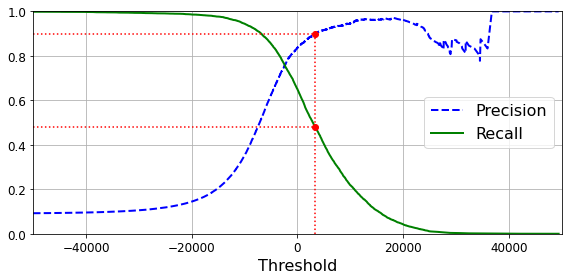

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
#save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

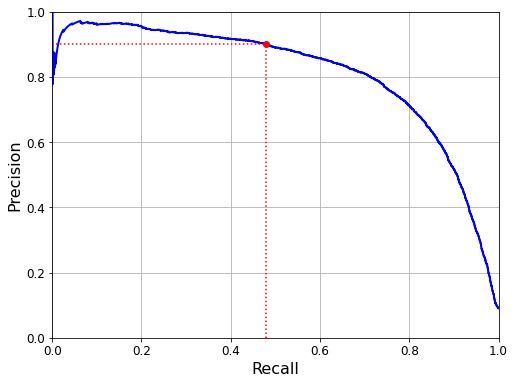

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
# save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Saving figure roc_curve_plot


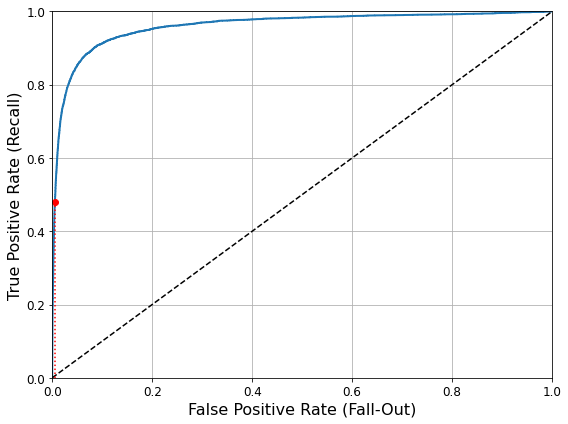

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
#save_fig("roc_curve_plot")                                    
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


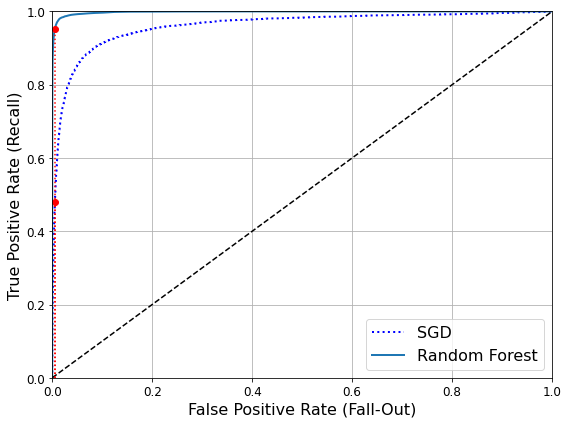

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier 

pipeline = Pipeline(steps=[('classifier',RandomForestClassifier())])

params = [
        {
         'classifier': [GradientBoostingClassifier(random_state=42)],
         'classifier__max_depth':[10],
         'classifier__n_estimators': [10,20],
         'classifier__n_iter_no_change':[10],
         'classifier__learning_rate':[0.1,1]
        },
    {
          'classifier': [XGBClassifier(random_state=42)],
         'classifier__n_estimators': [10,20],
          'classifier__learning_rate':[0.1,1]
        },
          # {
          #  'classifier': [RandomForestClassifier(random_state=42)],
          #  'classifier__n_estimators':[10,20],
          #  'classifier__min_samples_split':[4],
          # }         
]

grid_search = GridSearchCV(pipeline, params, verbose=10, n_jobs=3,scoring='roc_auc',cv=3).fit(X_train[:1000], y_train_5[:1000])


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('classifier',
                 XGBClassifier(n_estimators=20, random_state=42))])

In [ ]:
cv = pd.DataFrame(grid_search.cv_results_)

In [ ]:
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__n_iter_no_change,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.735153,0.160016,0.012084,0.000335,GradientBoostingClassifier(random_state=42),0.1,10,10,10,{'classifier': GradientBoostingClassifier(rand...,0.869318,0.753044,0.886744,0.836368,0.059347,5
1,3.369560,0.001801,0.010186,0.002348,GradientBoostingClassifier(random_state=42),0.1,10,20,10,{'classifier': GradientBoostingClassifier(rand...,0.868892,0.679128,0.888174,0.812065,0.094329,7
2,1.874437,0.381726,0.009227,0.003299,GradientBoostingClassifier(random_state=42),1,10,10,10,{'classifier': GradientBoostingClassifier(rand...,0.838710,0.681745,0.905006,0.808487,0.093617,8
3,2.448800,0.920952,0.006905,0.003446,GradientBoostingClassifier(random_state=42),1,10,20,10,{'classifier': GradientBoostingClassifier(rand...,0.853189,0.716887,0.909956,0.826677,0.081019,6
4,0.647598,0.038445,0.016616,0.001395,"XGBClassifier(n_estimators=20, random_state=42)",0.1,NaN,10,NaN,"{'classifier': XGBClassifier(n_estimators=20, ...",0.967529,0.890996,0.853520,0.904015,0.047446,4
5,1.095137,0.041348,0.015237,0.003249,"XGBClassifier(n_estimators=20, random_state=42)",0.1,NaN,20,NaN,"{'classifier': XGBClassifier(n_estimators=20, ...",0.972959,0.923307,0.892904,0.929723,0.032995,1
6,0.554292,0.037258,0.012315,0.003320,"XGBClassifier(n_estimators=20, random_state=42)",1,NaN,10,NaN,"{'classifier': XGBClassifier(n_estimators=20, ...",0.959331,0.880154,0.903685,0.914390,0.033199,3
7,0.892108,0.118380,0.012207,0.003190,"XGBClassifier(n_estimators=20, random_state=42)",1,NaN,20,NaN,"{'classifier': XGBClassifier(n_estimators=20, ...",0.961035,0.891583,0.908581,0.920400,0.029560,2


Let's try our checklist on a new dataset

Titanic -- well known dataset available from Kaggle

In [ ]:
training = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/titanic/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/titanic/test.csv')